In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)


np.set_printoptions(threshold=np.inf)
np.set_printoptions(linewidth=100)


In [7]:
df1 = pd.read_csv('../data/non.csv')
df1['source'] = 'NONs'
df2 = pd.read_csv('../data/acop.csv')
df2['source'] = 'ACOPs'
df3 = pd.read_csv('../data/uao.csv')
df3['source'] = 'UAOs'

df = pd.concat([df1, df2, df3])
print(df.shape)
df.head()

(3656, 8)


,filename,citations,circumstance,year,RTNs,location,link,source
0,2-0012943 - CHARLTON - NON 01-31-2003,"['40.0420', '40.0333', '40.0314']","on september 17, 1999 the department was notified of a release of oil occurred at the aboverefer...",2003,2-0012943,CHARLTON,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0012943,NONs
1,2-0012943 - CHARLTON - NON 01-31-2003,"['40.0314', '40.0501', '40.0315', '40.0443', '40.0404']","on september 17, 1999 the department was notified of a release of oil occurred at the aboverefer...",2003,2-0012943,CHARLTON,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0012943,NONs
2,2-0000642 - AYER - NON A 09-25-2003,"['40.0740', '40.0550']","the department issued you a tier ic permit, which became effective on august 19, 1994 and expire...",2003,2-0000642,AYER,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0000642,NONs
3,2-0013076 - BELLINGHAM - NON 12-11-2001,"['40.0420', '40.0333']","on january 17, 2000 the department was notified of a release of fuel oil from an aboveground sto...",2001,2-0013076,BELLINGHAM,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0013076,NONs
4,2-0013076 - BELLINGHAM - NON 12-11-2001,['40.0425'],"on january 17, 2000 the department was notified of a release of fuel oil from an aboveground sto...",2001,2-0013076,BELLINGHAM,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0013076,NONs


## 1. Overall
https://planspace.org/20150607-textblob_sentiment/

In [10]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['circumstance'].apply(pol)
df['subjectivity'] = df['circumstance'].apply(sub)
df.head()

,filename,citations,circumstance,year,RTNs,location,link,source,polarity,subjectivity
0,2-0012943 - CHARLTON - NON 01-31-2003,"['40.0420', '40.0333', '40.0314']","on september 17, 1999 the department was notified of a release of oil occurred at the aboverefer...",2003,2-0012943,CHARLTON,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0012943,NONs,0.050000,0.112500
1,2-0012943 - CHARLTON - NON 01-31-2003,"['40.0314', '40.0501', '40.0315', '40.0443', '40.0404']","on september 17, 1999 the department was notified of a release of oil occurred at the aboverefer...",2003,2-0012943,CHARLTON,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0012943,NONs,0.050000,0.050000
2,2-0000642 - AYER - NON A 09-25-2003,"['40.0740', '40.0550']","the department issued you a tier ic permit, which became effective on august 19, 1994 and expire...",2003,2-0000642,AYER,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0000642,NONs,0.185714,0.335714
3,2-0013076 - BELLINGHAM - NON 12-11-2001,"['40.0420', '40.0333']","on january 17, 2000 the department was notified of a release of fuel oil from an aboveground sto...",2001,2-0013076,BELLINGHAM,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0013076,NONs,0.020000,0.085000
4,2-0013076 - BELLINGHAM - NON 12-11-2001,['40.0425'],"on january 17, 2000 the department was notified of a release of fuel oil from an aboveground sto...",2001,2-0013076,BELLINGHAM,https://eeaonline.eea.state.ma.us/EEA/fileviewer/Rtn.aspx?rtn=2-0013076,NONs,0.033333,0.108333


[]

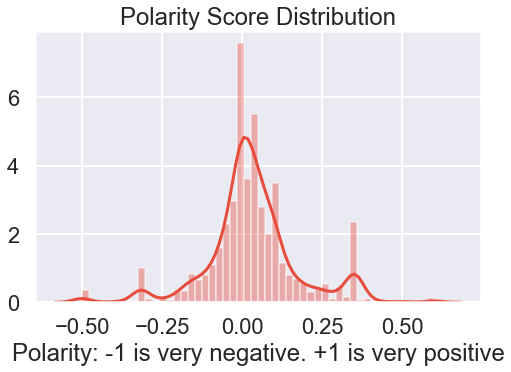

In [35]:
sns.set(style="darkgrid")
sns.set_context("poster")

plt.figure(figsize=(8, 5))
sns.distplot(df['polarity'], color="#e74c3c")
plt.title("Polarity Score Distribution")
plt.xlabel("Polarity: -1 is very negative. +1 is very positive")
plt.plot()

[]

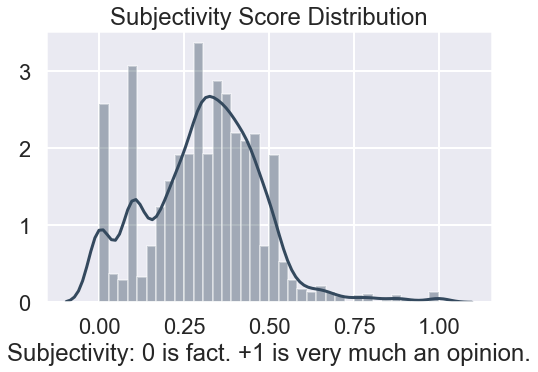

In [36]:
plt.figure(figsize=(8, 5))
sns.distplot(df['subjectivity'], color="#34495e")
plt.title("Subjectivity Score Distribution")
plt.xlabel("Subjectivity: 0 is fact. +1 is very much an opinion.")

plt.plot()

## 2. By Location

In [37]:
df.loc[df.location=='WORCETER', 'location'] = 'WORCESTER'
df.loc[df.location=='WORCESTSER', 'location'] = 'WORCESTER'
df.loc[df.location=='W BOYLSTON', 'location'] = 'BOYLSTON'  
df.loc[df.location=='WESTBORO', 'location'] = 'WESTBOROUGH'
df.loc[df.location=='MARLBOROGH', 'location'] = 'MARLBOROUGH' 
df.loc[df.location=='NORTH UXBRIDGE', 'location'] = 'NORTHBRIDGE' 

In [38]:
sent = df.groupby(['location'])['polarity'].agg(['mean', 'count']) #.sort_values('mean', ascending=True)

sent = sent.add_suffix('_polarity').reset_index()

subj = df.groupby(['location'])['subjectivity'].agg(['mean']) #.sort_values('mean', ascending=True)
subj = subj.add_suffix('_subjectivity').reset_index()

In [39]:
by_loc_sent = subj.merge(sent).rename(columns = {'count_polarity':'count'})
by_loc_sent.head()

,location,mean_subjectivity,mean_polarity,count
0,ACTON,0.313858,0.052341,50
1,ASHBURNHAM,0.360845,0.032077,13
2,ASHBY,0.345787,0.048808,33
3,ATHOL,0.304000,0.055722,18
4,AUBURN,0.314035,0.034291,111


In [40]:
# Most Positive 10 Regions
top10pos = by_loc_sent.sort_values('mean_polarity', ascending=False).reset_index(drop=True)[['location',
                                                                                  'mean_polarity',
                                                                                  'count']].head(10)
top10pos

,location,mean_polarity,count
0,TYNGSBOROUGH,0.248667,5
1,WARREN,0.216667,3
2,TYNGSBORO,0.197923,9
3,LITTLETON,0.137550,19
4,SOUTH GRAFTON,0.137500,2
5,FRANKLIN,0.132301,7
6,BERLIN,0.113411,12
7,UNKNOWN,0.098186,14
8,BOXBOROUGH,0.096656,11
9,CHARLTON CITY,0.096459,7


In [41]:
# Most Negative 10 Regions
top10neg = by_loc_sent.sort_values('mean_polarity', ascending=True).reset_index(drop=True)[['location',
                                                                                  'mean_polarity',
                                                                                  'count']].head(10)
top10neg

,location,mean_polarity,count
0,CHERRY VALLEY,-0.188333,5
1,NORTH GRAFTON,-0.086444,3
2,RUTLAND,-0.081983,29
3,MANCHAUG,-0.054286,7
4,PEPPERELL,-0.039792,12
5,HARVARD,-0.028074,37
6,MEDFIELD,-0.021537,13
7,NORFOLK,-0.017837,37
8,HOPEDALE,-0.016628,27
9,HUDSON,-0.005907,67


In [42]:
# Most Subjective 10 Regions
by_loc_sent.sort_values('mean_subjectivity', ascending=False).reset_index(drop=True)[['location',
                                                                                  'mean_subjectivity',
                                                                                  'count']].head(10)


,location,mean_subjectivity,count
0,MANCHAUG,0.565714,7
1,WHITINSVILLE,0.533333,1
2,EAST BROOKFIELD,0.439044,3
3,SOUTH GRAFTON,0.437500,2
4,DEVENS,0.435807,2
5,TYNGSBORO,0.427784,9
6,TYNGSBOROUGH,0.418667,5
7,BOXBOROUGH,0.415761,11
8,NORTHBRIDGE,0.397597,15
9,AYER,0.391977,33


In [43]:
# Most Objective 10 Regions
by_loc_sent.sort_values('mean_subjectivity', ascending=True).reset_index(drop=True)[['location',
                                                                                  'mean_subjectivity',
                                                                                  'count']].head(10)


,location,mean_subjectivity,count
0,PHILLIPSTON,0.000000,1
1,NORTH BROOKFIELD,0.084788,21
2,NORTH OXFORD,0.180000,5
3,BROOKFIELD,0.197019,5
4,UPTON,0.203218,5
5,BALDWINVILLE,0.208452,5
6,NBROOKFIELD,0.211111,1
7,CHARLTON CITY,0.212439,7
8,SHIRLEY,0.220805,18
9,STERLING,0.225234,5
